In [1]:
import numpy as np 
import pandas as pd 
from keras.models import Sequential 
from keras.layers.core import Dense, Activation 
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from time import time
import matplotlib.pyplot as plt 
%matplotlib inline 

C:\Users\Administrator\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load training notMNIST data
notMNIST = np.load('notMNIST_train_AB.npz')
images_train = notMNIST['images_train']
labels_train = notMNIST['labels_train']
label_names = notMNIST['label_names']
print(images_train.shape)
print(labels_train.shape)

(100000, 28, 28)
(100000,)


In [3]:
pd.Series(labels_train).value_counts()

1    50000
0    50000
dtype: int64

In [4]:
tally = pd.Series(labels_train).value_counts()
acc_baseline = tally.max()/tally.sum()
print('baseline accuracy rate is',acc_baseline)

baseline accuracy rate is 0.5


In [5]:
X = images_train.reshape(100000,28*28)
P = pd.get_dummies(pd.DataFrame(labels_train,columns=['digit'],dtype='category')).values

In [14]:
model = Sequential()
model.add(Dense(256,input_shape=(28*28,)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

time_start = time()
hist = model.fit(X,P,epochs=100,validation_split =0.2,verbose=0,batch_size=1000,callbacks=[EarlyStopping(patience=10)])
time_stop = time()
time_elapsed = time_stop - time_start


elapsed time = 106.21604681015015
minimum validation loss index 10 of 100
cross-entropy
        training = 0.037286333204247055
      validation = 0.09128074571490288
accuracy rate
        training = 0.9864374972879887
      validation = 0.9643999993801117
        baseline = 0.5


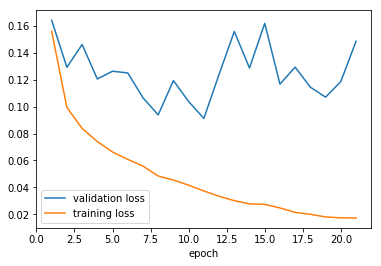

In [15]:
results = pd.DataFrame() 
results['epoch'] = hist.epoch 
results['epoch'] = results['epoch'] + 1 
results['training loss'] = hist.history['loss'] 
results['validation loss'] = hist.history['val_loss'] 
results['training acc'] = hist.history['acc'] 
results['validation acc'] = hist.history['val_acc']

ix = results['validation loss'].idxmin()
ce_training   = results['training loss'].iloc[ix]
ce_validation = results['validation loss'].iloc[ix]
acc_training   = results['training acc'].iloc[ix]
acc_validation = results['validation acc'].iloc[ix]
print()
print('elapsed time =',time_elapsed)
print('minimum validation loss index',ix,'of',100)
print('cross-entropy')
print('        training =',ce_training)
print('      validation =',ce_validation)
print('accuracy rate')
print('        training =',acc_training)
print('      validation =',acc_validation)
print('        baseline =',acc_baseline)

ax = results.plot.line(x='epoch',y='validation loss')
results.plot.line(x='epoch',y='training loss',ax=ax)

1000 batch size: 1.627s/epoch 24 epochs validation accuracy: 91.465%

100 batch size: 3.012s/epoch 13 epochs validation accuracy: 91.690%

10 batch size: 19.737s/epoch 13 epochs validation accuracy: 93.170%

1 batch size: 186.796s/epoch 16 epochs validation accuracy: 92.5%

Choose 1000 batches.

After adding the 256 node layer, validation accuracy is 96.440%.

In [17]:
notMNIST = np.load('notMNIST_test_AB.npz')
images_test = notMNIST['test_images']
labels_test = notMNIST['test_labels']
print(images_test.shape)
print(labels_test.shape)

(2000, 28, 28)
(2000,)


In [19]:
X_test = notMNIST['test_images'].reshape(2000,28*28)
P_test = pd.get_dummies(pd.DataFrame(notMNIST['test_labels'],columns=['digit'],dtype='category')).values

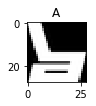

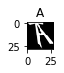

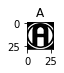

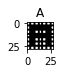

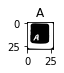

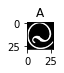

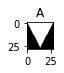

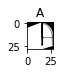

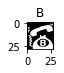

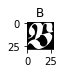

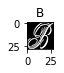

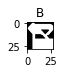

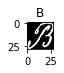

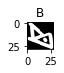

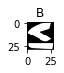

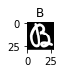

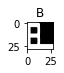

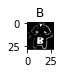

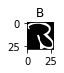

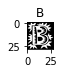

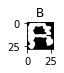

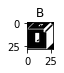

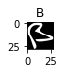

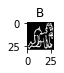

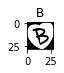

In [21]:
Ph_test = model.predict(X_test)
ix_errors = (Ph_test.argmax(axis=1) != P_test.argmax(axis=1))
images_errors = images_test[ix_errors,:,:]
labels_errors = labels_test[ix_errors]
acc_test = 1 - len(images_errors)/len(images_test)
N = 8
M = 7
plt.figure(figsize=(10,10))
for i in range(len(images_errors)):
    plt.subplot(M, N, i+1)
    plt.imshow(images_errors[i,:,:], cmap='Greys_r')
    plt.title(label_names[labels_errors[i]])
    plt.show()

In [22]:
print('test accuracy',acc_test)

0.9875


In [23]:
print('errors',len(images_errors))

25

I made 13 mistakes on recognizing the letters. So human accuracy is 

In [24]:
1-(13/2000)

0.9935